# 1. Project Loan Approval Prediction

## 1.1 วัตถุประสงค์

**💛💚 วัตถุประสงค์หลักของการทำ Loan Prediction แบบ Classification  คือ
การสร้างโมเดลที่สามารถทำนายความน่าจะเป็นของการอนุมัติสินเชื่อหรือปฏิเสธสินเชื่อให้กับผู้สมัครขอสินเชื่อ**

# 2. Importing Libraries

In [606]:
!pip  install missingno

In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import os
import warnings 
warnings.filterwarnings("ignore")

In [608]:
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [609]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [610]:
!pip install -U imbalanced-learn

In [611]:
from imblearn.over_sampling import SMOTE

In [612]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 3. Reading Dataset

In [613]:
df=pd.read_csv(r"C:\Users\muent\Desktop\my project for data analyst\Project-13_Loan_Prediction_Machine_Learning\Dataset\Loan_Dataset.csv")

In [614]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**💛 ตัวแปร 💛**

1. Loan_ID: รหัสของผู้สมัครขอกู้สินเชื่อ
2. Gender: เพศ
3. Married: สถานภาพ
4. Dependents: จำนวนผู้อยู่ในอุปการะของผู้สมัครขอกู้สินเชื่อ
5. Education: การศึกษา
6. Self_Employed: ประกอบอาชีพอิสระหรือเป็นลูกจ้าง
7. ApplicantIncome: รายได้ของผู้สมัครขอกู้สินเชื่อ
8. CoapplicantIncome: รายได้ของผู้กู้ร่วม
9. LoanAmount: จำนวนเงินกู้ที่ยื่นขอสินเชื่อ
10. Loan_Amount_Term: ระยะเวลาผ่อนชำระ(วัน)
11. Credit_History: เครดิตทางการเงินของผู้สมัครขอกู้สินเชื่อ
12. Property_Area: พื้นที่อยู่อาศัยของผู้สมัครขอกู้สินเชื่อ
13. Loan_Status: สถานะการอนุมัติสินเชื่อ(ผ่าน/ไม่ผ่าน)

In [615]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 4. Data Exploration 

## 4.1 Categorical Variable 

### พิจารณาตัวแปรประเภทหมวดหมู่ (Categorical Variable)

#### 4.1.1  Loan_ID

In [617]:
df.Loan_ID.value_counts(dropna= False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

    💚 มีผู้สมัครขอสินเชื่อทั้งหมด 614 คน

#### 4.1.2 Gender

In [618]:
df.Gender.value_counts(dropna= False) #dropna= False คือ นับค่า null ด้วย

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

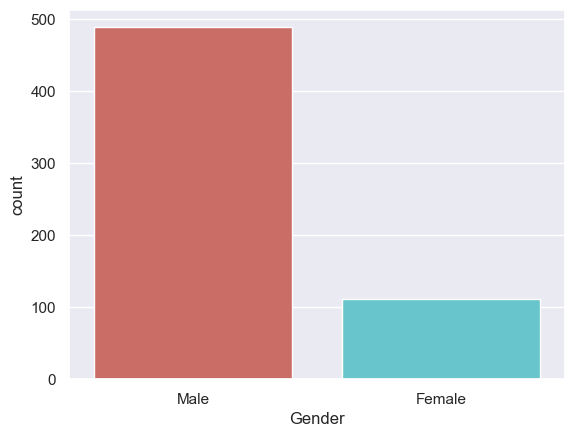

In [619]:
sns.countplot(data = df , x = "Gender", palette= "hls")
plt.show()

In [620]:
countMale = len(df[df.Gender == "Male"])
countFemale = len(df[df.Gender == "Female"])
countNull = len(df[df.Gender.isnull()])

print("Percantage of Male applicant : {:.2f}%".format( countMale*100/len(df.Gender)))
print("Percantage of Female applicant : {:.2f}%".format( countFemale*100/len(df.Gender)))
print("Missing values percentage: {:.2f}%".format( countNull*100/len(df.Gender)))

Percantage of Male applicant : 79.64%
Percantage of Female applicant : 18.24%
Missing values percentage: 2.12%


     💚 จากผลลัพธ์ข้างต้น จำนวนผู้สมัครที่เป็นเพศชายสูงกว่าผู้สมัครเพศหญิง 
     ❌ ในคอลัมน์นี้มี Missing Value ด้วย

#### 4.1.3 Married

In [621]:
df.Married.value_counts(dropna= False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

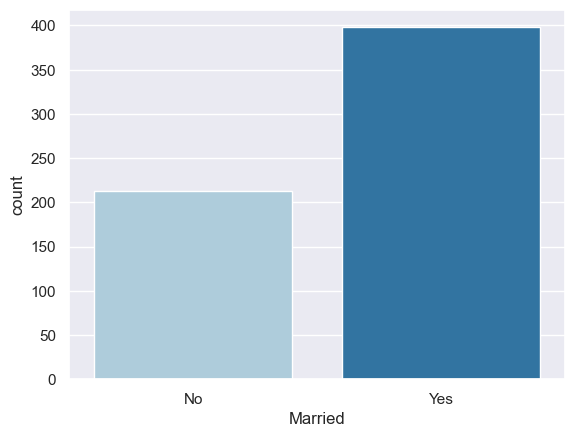

In [622]:
sns.countplot(data = df , x = "Married", palette= "Paired")
plt.show()

In [623]:
countMarried = len(df[df.Married == "Yes"])
countNotMarried = len(df[df.Married == "No"])
countNull = len(df[df.Married.isnull()])

print("Percantage of Married applicant : {:.2f}%".format( countMarried*100/len(df.Married)))
print("Percantage of Not married applicant: {:.2f}%".format( countNotMarried*100/len(df.Married)))
print("Missing values percentage: {:.2f}%".format( countNull*100/len(df.Married)))

Percantage of Married applicant : 64.82%
Percantage of Not married applicant: 34.69%
Missing values percentage: 0.49%


        💚 จากผลลัพธ์ข้างต้น จำนวนผู้สมัครที่แต่งงานแล้วมีมากกว่าผู้สมัครที่ยังโสด 
        ❌ ในคอลัมน์นี้มี Missing Value ด้วย

#### 4.1.4 Dependent

In [624]:
df.Dependents.value_counts(dropna = False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

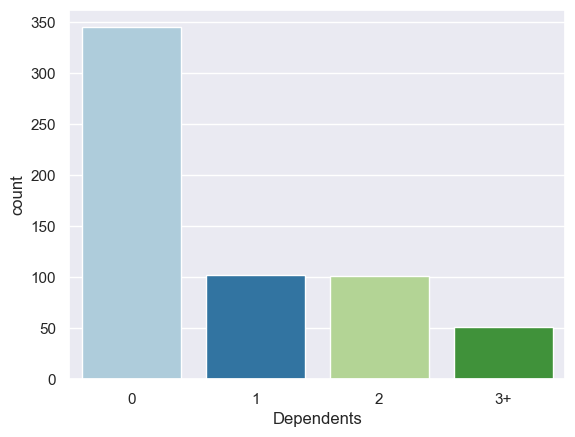

In [625]:
sns.countplot(data = df , x = "Dependents", palette= "Paired")
plt.show()

In [626]:
countNoDependent = len(df[df.Dependents == "0"])
count_1_Dependent = len(df[df.Dependents == "1"])
count_2_Dependent = len(df[df.Dependents == "2"])
count_3up_Dependent = len(df[df.Dependents == "3+"])
countNull = len(df[df.Dependents.isnull()])

print("Percantage of No Dependent : {:.2f}%".format( countNoDependent*100/len(df.Dependents)))
print("Percantage of 1 Dependent : {:.2f}%".format( count_1_Dependent*100/len(df.Dependents)))
print("Percantage of 2 Dependent : {:.2f}%".format( count_2_Dependent*100/len(df.Dependents)))
print("Percantage of 3+ Dependent : {:.2f}%".format( count_3up_Dependent*100/len(df.Dependents)))
print("Missing values percentage: {:.2f}%".format( countNull*100/len(df.Dependents)))

Percantage of No Dependent : 56.19%
Percantage of 1 Dependent : 16.61%
Percantage of 2 Dependent : 16.45%
Percantage of 3+ Dependent : 8.31%
Missing values percentage: 2.44%


    💚 จากผลลัพธ์ข้างต้น ได้แสดงให้เห็นว่าผู้สมัครขอสินเชื่อมีจำนวนของผู้อยู่ในอุปการะกี่คน       
    💚 เช่น 0 ไม่มีผู้อยู่ในอุปการะ , 1 มีผู้อยู่ในอุปการะจำนวน 1 คน , 2 มีผู้อยู่ในอุปการะจำนวน 2 คน , 3+ มีผู้อยู่ในอุปการะจำนวน 3 คนขึ้นไป 
    ❌ ในคอลัมน์นี้มี Missing Value ด้วย

#### 4.1.5 Education

In [627]:
df.Education.value_counts(dropna= False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

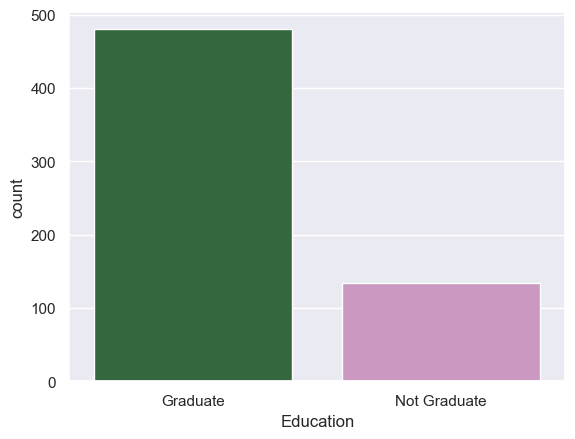

In [628]:
sns.countplot(data = df , x = "Education", palette= "cubehelix")
plt.show()

In [629]:
countGraduate = len(df[df.Education == "Graduate"])
countNotGraduate = len(df[df.Education == "Not Graduate"])
countNull = len(df[df.Education.isnull()])

print("Percantage of Graduate : {:.2f}%".format(countGraduate*100/len(df.Education)))
print("Percantage of Not Graduate : {:.2f}%".format(countNotGraduate*100/len(df.Education)))
print("Missing values percentage: {:.2f}%".format( countNull*100/len(df.Education)))

Percantage of Graduate : 78.18%
Percantage of Not Graduate : 21.82%
Missing values percentage: 0.00%


    💚 จากผลลัพธ์ข้างต้น ผู้สมัครที่จบป.ตรีขึ้นไปมีจำนวนมากกว่าผู้สมัครที่การศึกษาต่ำกว่าป.ตรี 
    ✅ ในคอลัมน์นี้ไม่มี Missing Value

#### 4.1.6 Self Employed

In [630]:
df.Self_Employed.value_counts(dropna= False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

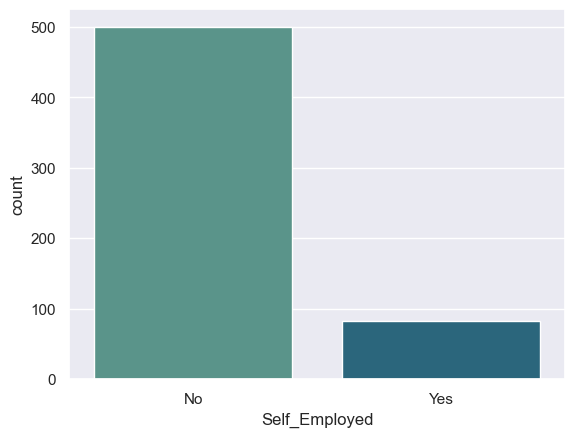

In [631]:
sns.countplot(data = df, x = "Self_Employed", palette= "crest")
plt.show()

In [632]:
countNotSelf_Employed = len(df[df.Self_Employed == "No"])
countSelf_Employed = len(df[df.Self_Employed == "Yes"])
countNull = len(df[df.Self_Employed.isnull()])

print("Percantage of Not Self_Employed : {:.2f}%".format(countNotSelf_Employed*100/len(df.Self_Employed)))
print("Percantage of Self_Employed : {:.2f}%".format(countSelf_Employed*100/len(df.Self_Employed)))
print("Missing values percentage: {:.2f}%".format( countNull*100/len(df.Self_Employed)))

Percantage of Not Self_Employed : 81.43%
Percantage of Self_Employed : 13.36%
Missing values percentage: 5.21%


    💚 จากผลลัพธ์ข้างต้น จำนวนผู้สมัครที่ไม่ได้ประกอบอาชีพอิสระสูงกว่าผู้สมัครที่ประกอบอาชีพอิสระ  
    ❌ ในคอลัมน์นี้มี Missing Value

#### 4.1.7 Property Area

In [633]:
df.Property_Area.value_counts(dropna= False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

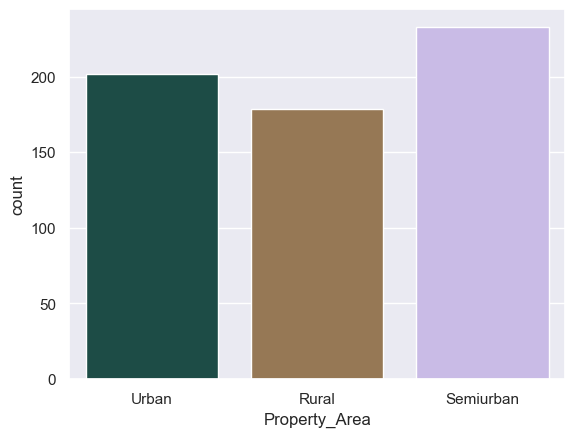

In [634]:
sns.countplot(data = df, x = "Property_Area", palette= "cubehelix")
plt.show()

In [635]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


    💚 จากผลลัพธ์ข้างต้น ผู้สมัครส่วนใหญ่จะอาศัยอยู่ชานเมือง (Semiurban)
    ✅ ในคอลัมน์นี้ไม่มี Missing Value

#### 4.1.8 Loan Status

In [636]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

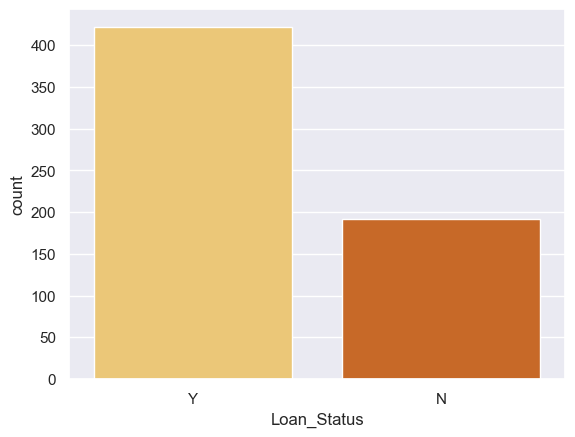

In [637]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [638]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


    💚 จากผลลัพธ์ข้างต้น การอนุมัติสินเชื่อมีจำนวนมากกว่าการปฎิเสธสินเชื่อ 
    ✅ ในคอลัมน์นี้ไม่มี Missing Value

#### 4.1.9 Loan Status

In [639]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

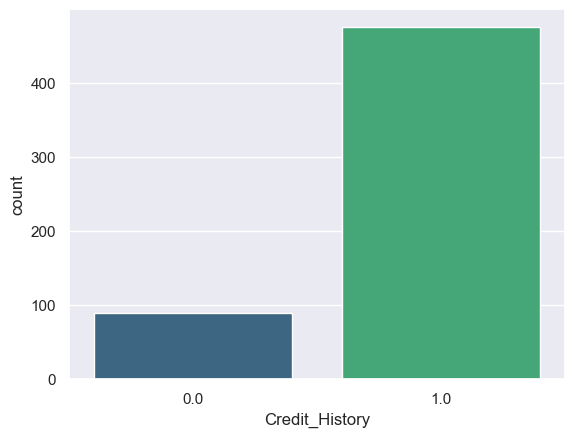

In [640]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [641]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


    💚 จากผลลัพธ์ข้างต้น  ผู้สมัครมีเครดิตสินเชื่อที่ดีมีจำนวนสูงกว่าผู้สมัครที่เครดิตไม่ดี 
    ❌ ในคอลัมน์นี้มี  Missing Value

#### 4.1.10 Loan Amount Term

In [642]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

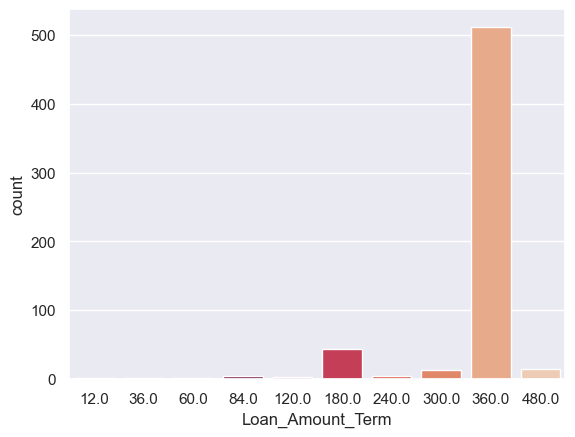

In [643]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [644]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


    💚 การผ่อนชำระสินเชื่อส่วนมาก คือ 360 วัน

## 4.2 Numerical Variable

### 4.2.1 Describe Numerical Variable

    💛 ค่าสถิติเบื้องต้น mean, count, std, min, max 

In [645]:
df[["ApplicantIncome","CoapplicantIncome", "LoanAmount"]].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### 4.2.2 Distribution of Numerical Variable

    💛 จะพล็อตกราฟ Histogram  และ Box plot เพื่อพิจารณาการกระจายตัวและ ดู outlier

#### 4.2.2.1 Histogram Distribution 

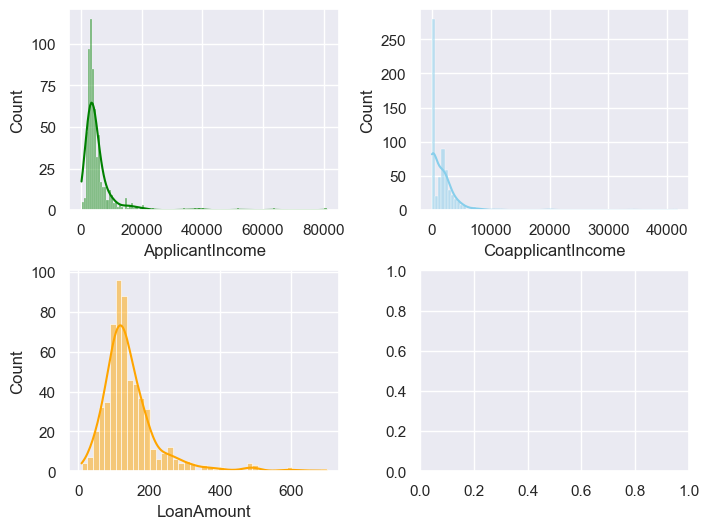

In [646]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=False)  # sharex=False เพื่อไม่ให้แกน x ของแต่ละกราฟเชื่อมโยงกัน

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

# ปรับช่องว่างระหว่างกราฟด้านบนและด้านล่าง
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3)  

#### 4.2.2.1  Boxplot

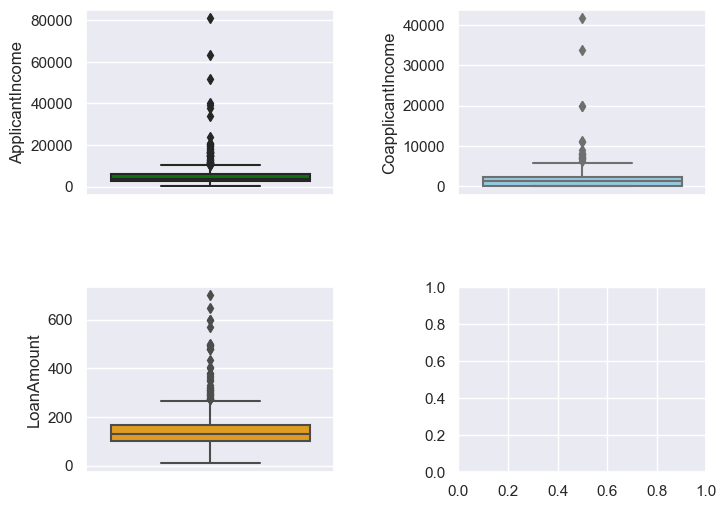

In [647]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(8, 6), sharex= False)

sns.boxplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.boxplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

fig.subplots_adjust(hspace= 0.5, wspace= 0.5)

- การกระจายตัวของ **Applicant income** , **Co Applicant Income** และ **Loan Amount** เป็นแบบกราฟเบ้ขวา
- และมีค่า outlier ด้วย

## 4.3 Other Exploration

#### 💛 วิเคราะห์ความสัมพันธ์ของแต่ละตัวแปร
    - Heatmap
    - Bivariate analysis (categorical & categorical, categroical & numerical, and numerical & numerical)


### 4.3.1 Heatmap 

In [648]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


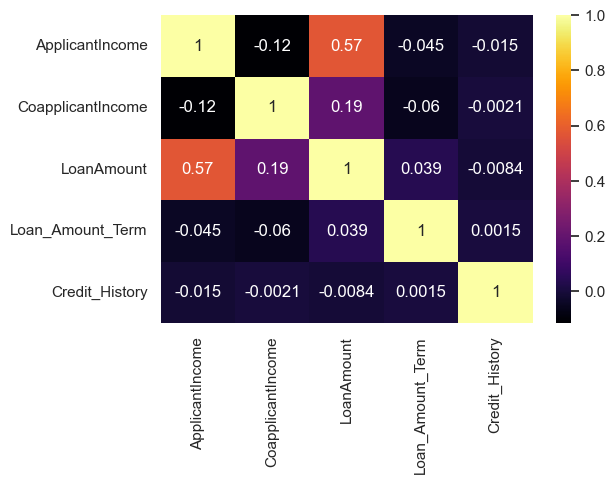

In [649]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot= True, cmap='inferno')
plt.show()

   💛 มีความสัมพันธ์ในทิศทางบวกระหว่าง **Loan Amount** และ **Applicant Income**

### 4.3.2 Categorical & Categorical

#### 4.3.2.1 Gender & Married

In [650]:
pd.crosstab(df.Gender, df.Married)

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


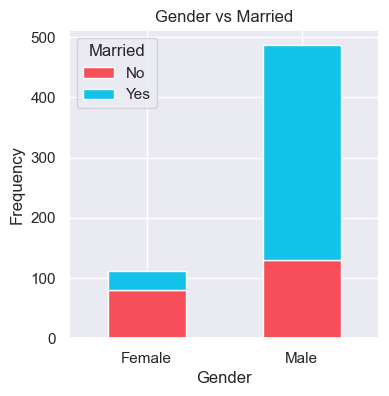

In [651]:
pd.crosstab(df.Gender, df.Married).plot(kind = "bar", stacked = True, figsize=(4,4), color=['#f64f59','#12c2e9'])

plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

    💛 ผู้สมัครขอสินเชื่อส่วนมากเป็นเพศชายที่แต่งงานแล้ว
    💛 และ ผู้สมัครขอสินเชื่อเพศชายที่ยังไม่แต่งงานก็มีจำนวนมากกว่าผู้สมัครขอสินเชื่อเพศหญิงที่ยังไม่แต่งงาน ด้วยเช่นกัน

#### 4.3.2.2 Self Employed & Credit History

In [652]:
pd.crosstab(df.Self_Employed,df.Credit_History)

Credit_History,0.0,1.0
Self_Employed,,
No,76,387
Yes,12,63


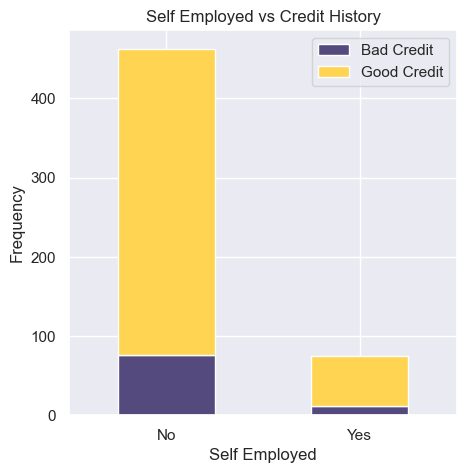

In [653]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])

plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

    💛 ผู้ที่เป็นลูกจ้างมีเครดิตสินเชื่อที่ดีกว่าผู้ประกอบอาชีพอิสระ

#### 4.3.2.3 Property Area & Loan Status

In [654]:
pd.crosstab(df.Property_Area,df.Loan_Status)

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


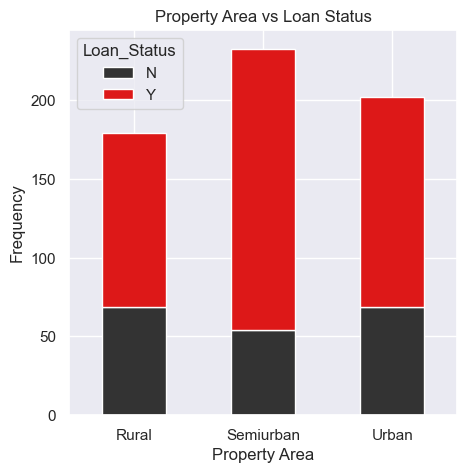

In [655]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])

plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

    💛 ผู้ขอสินเชื่อส่วนใหญ่ที่ได้รับการอนุมัตินั้น อาศัยอยู่ชานเมืองมากกว่าพื้นที่ในเมืองและชนบท

### 4.3.3 Categorical & Numerical 

#### 4.3.3.1 Loan_Status & ApplicantIncome

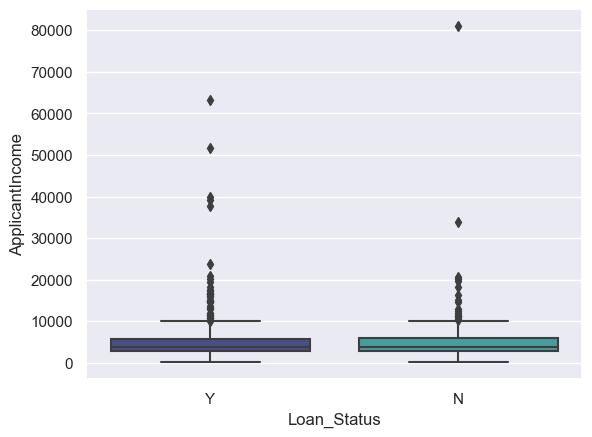

In [656]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

💛 ใน **Applicant Income** มี outlier , และการกระจายตัวเป็นแบบกราฟเบ้ขวา

#### 4.3.3.2 Loan_Status & CoApplicantIncome

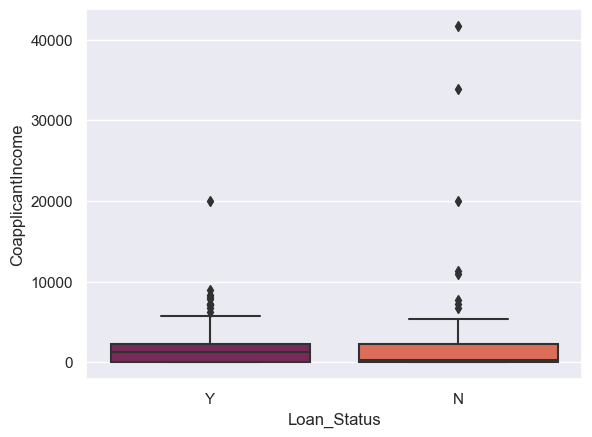

In [657]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=df, palette="rocket");

💛ใน **Coapplicant Income** มี outlier , และการกระจายตัวเป็นแบบกราฟเบ้ขวา

#### 4.3.3.3 Loan_Status & LoanAmount

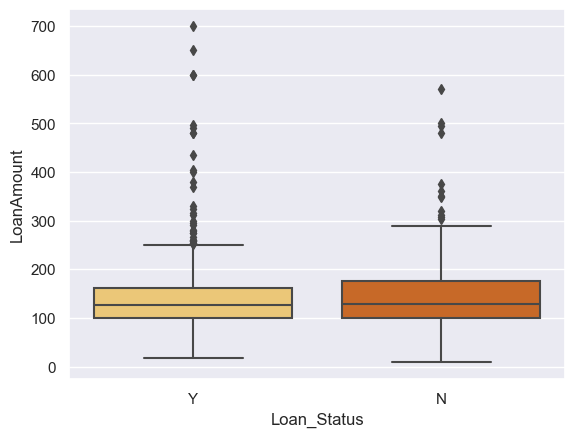

In [658]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

💛 ใน **LoanAmount** มี outlier , และการกระจายตัวเป็นแบบกราฟเบ้ขวา

### 4.3.4 Numerical & Numerical 

#### 4.3.4.1 ApplicantIncome & CoapplicantIncome

In [659]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


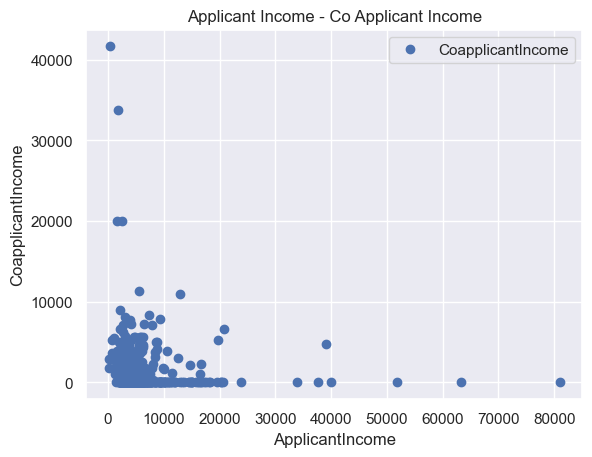

Pearson correlation: -0.11660458122889968
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40)


In [660]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()

print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

    💛 มีความสัมพันธ์เชิงลบระหว่าง Applicant income และ Co Applicant Income
    💛 ความสัมพันธ์ correlation ที่ระดับความเชื่อมั่น 95% , โดยมีค่า p-value < 0.05

# 4.4 Null Values 

In [661]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

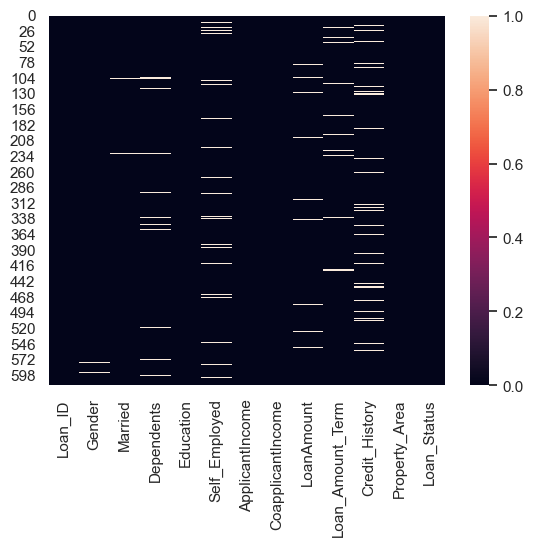

In [662]:
sns.heatmap(df.isnull())

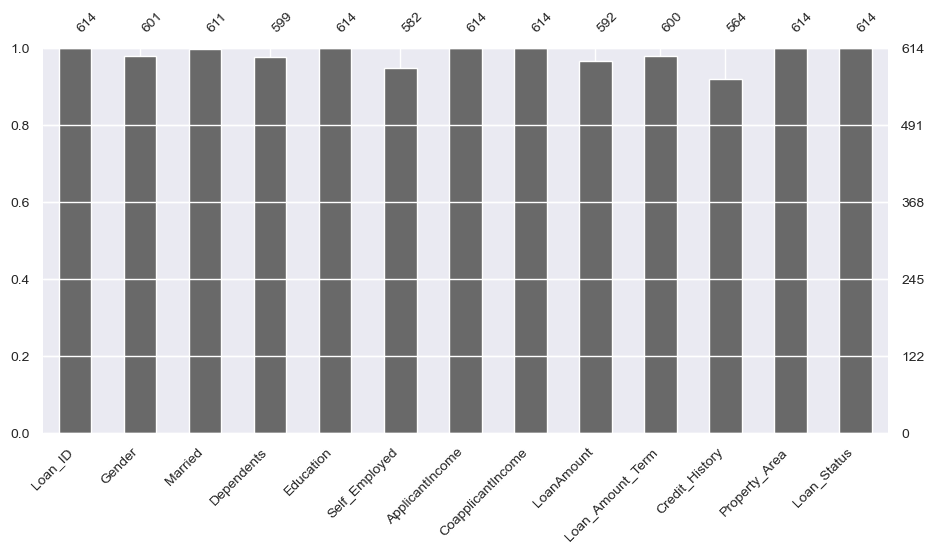

In [663]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,1)
mso.bar(df, ax = axz, fontsize = 10);

🧡 แสดงค่า null ของแต่ละตัวแปร

# 5. Data Preprocessing 

## 5.1 Drop Unecessary Variables

In [664]:
df = df.drop(['Loan_ID'], axis = 1)

## 5.2 Data Imputation การประมาณค่า

    🧡 การประมาณค่า (Imputation) เป็นเทคนิคในการแทนที่ค่าที่หายไปในชุดข้อมูลด้วยค่าประมาณการ 
    🧡 ในส่วนนี้จะทำการประมาณค่าสำหรับตัวแปรที่มีค่าหายไป(Missing Values)

   ### 5.2.1 Categorical Variables

🧡 ในส่วนของตัวแปรชนิด categorical variables จะแทนค่าที่หายไปด้วย ค่า **"mode"**

In [665]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [666]:
# coumns ที่เป็น categorical variables  ที่มี missing values
# Gender , Married, Dependents, Self_Employed , 
# เพิ่มเติม Credit_History, Loan_Amount_Term (ที่ไม่ได้เป็นตัวเลขเงิน)

df.select_dtypes(include=['object']).isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [667]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [668]:
df["Gender"].mode()[0]

'Male'

-  [0] จะทำให้ได้ค่า mode ค่าเดียว ซึ่งเป็นค่าที่ซ้ำมากที่สุด
-  แต่ไม่มี [0] ดังนั้นจะได้ pandas Series ของค่า mode ทั้งหมด

In [669]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)
df["Married"].fillna(df["Married"].mode()[0], inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace = True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)

### 5.2.2 Numerical Variables

🧡 ในส่วนของตัวแปรชนิด  Numerical Variables จะแทนค่าที่หายไปด้วย ค่า **"mean"**

In [670]:
# coumns ที่เป็น Numerical Variables   ที่มี missing values
# Gender , Married, Dependents, Self_Employed , 

df.select_dtypes(include=['int64', 'float64']).isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
dtype: int64

In [671]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace = True)

## 5.3 One-hot Encoding 

🧡 การทำรหัส encoding สำหรับข้อมูล **categorical variables**

In [672]:
df.select_dtypes(include= "object").columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [673]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [674]:
df = pd.get_dummies(df)

In [675]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [676]:
# Drop columns 
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [677]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


## 5.4 Remove Outliers

#### 💛 จัดการลบค่า Outlier

   - ใช้วิธี Interquartile Range (IQR) 
   - วิธีการใช้ IQR (Interquartile Range): คำนวณ IQR (Q3-Q1) และกำหนดขอบเขต (Q1-1.5IQR) และ (Q3+1.5IQR) ค่าที่อยู่นอกขอบเขตนี้ถือว่าเป็น Outlier

 - Varable ที่มีค่า outlier คือ **ApplicantIncome**, **CoapplicantIncome** และ **LoanAmount**

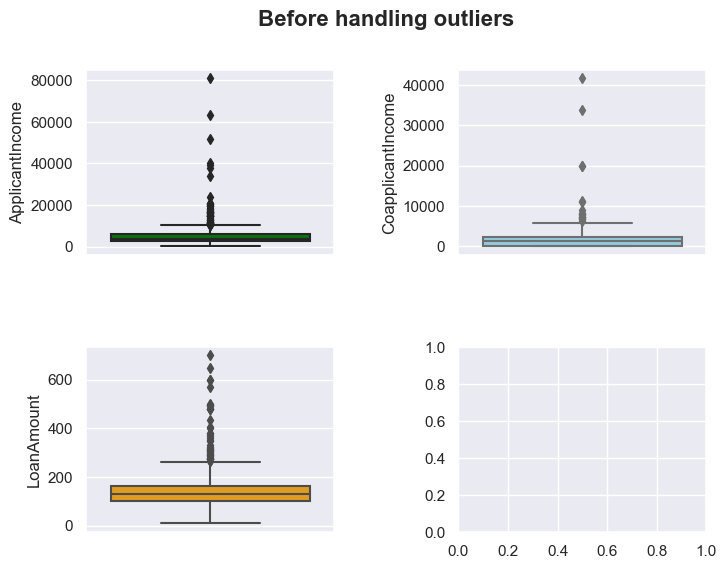

In [678]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(8, 6), sharex= False)

sns.boxplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.boxplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

fig.suptitle("Before handling outliers", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace= 0.5, wspace= 0.5)

In [679]:
# คอลัมน์ที่ต้องการจัดการ outliers
columns_to_handle = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# จัดการ outliers ใน columns ที่ระบุโดยใช้ IQR
for col in columns_to_handle:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [680]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849.0,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583.0,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000.0,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583.0,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000.0,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0,0,0,1,0,0,0,1,0,1,0,0,1
610,4106.0,0.0,40.000000,180.0,1.0,1,1,0,0,0,1,1,0,1,0,0,1
611,8072.0,240.0,253.000000,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1,1
612,7583.0,0.0,187.000000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1


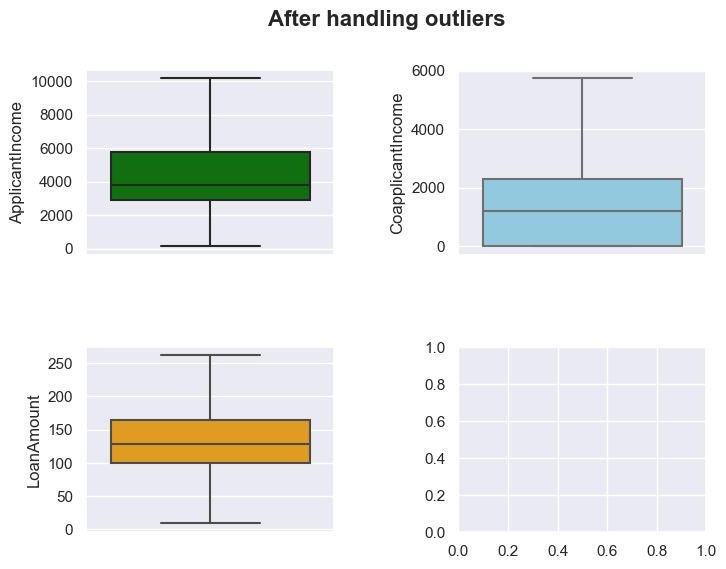

In [681]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(8, 6), sharex= False)

sns.boxplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.boxplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

fig.suptitle("After handling outliers", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace= 0.5, wspace= 0.5)

## 5.5 Skewed Distribution Treatment

##### 💛 เพื่อทำให้กราฟเบ้ขวาให้ใกล้เคียงการกระจายตัวแบบ normalized  distribution
- การจัดการกับการกระจายตัวของข้อมูลที่เบ้ (Skewed Distribution) ด้วยวิธี Square Root Transformation
- เป็นหนึ่งในเทคนิคที่ใช้กันบ่อยในการปรับรูปแบบของข้อมูลให้ใกล้เคียงกับการแจกแจงแบบปกติ (Normal Distribution) มากขึ้น 
- วิธีนี้จะเหมาะสำหรับข้อมูลที่มีค่าเบ้ไปทางขวา (Right-Skewed)

***เพิ่มเติม***
- สำหรับข้อมูลที่มีการกระจายตัวแบบเบ้ไปทางซ้าย (Left-Skewed) นั้น วิธีที่นิยมใช้ในการปรับแก้คือ Cube Root Transformation
- Cube Root Transformation คือการหารากที่สามของค่าในข้อมูลนั้น
- นอกจากนี้ ยังมีวิธีอื่นๆ ในการจัดการ Skewed Distribution 
- เช่น Log Transformation, Box-Cox Transformation เป็นต้น ขึ้นอยู่กับลักษณะของข้อมูลว่าควรใช้วิธีใดจะเหมาะสมที่สุด

In [682]:
# Square Root Transformation 

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

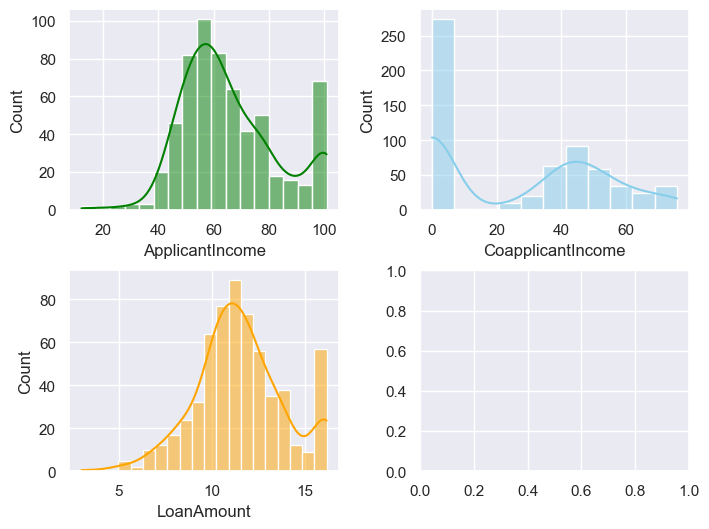

In [683]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex= False)

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

fig.subplots_adjust(hspace= 0.3 ,wspace=0.3)

## 5.6 Features Separating 

#### 🧡💚 กำหนดตัวแปรอิสระ (X) และ ตัวแปรตาม(y)

In [684]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

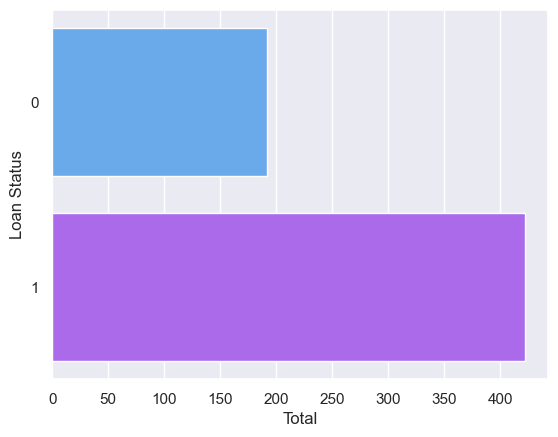

In [685]:
sns.set(style="darkgrid")
sns.countplot(y=y, data=df, palette="cool")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## 5.7 SMOTE Technique 

    💚 จากการสำรวจข้อมูลก่อนหน้านี้ สามารถเห็นได้ว่า จำนวนสินเชื่อที่ได้รับการอนุมัติและปฏิเสธนั้นไม่สมดุลกัน (Loan status) 
    💚 ** ดูจากกราฟในข้อ 5.6 Features Separating **
    💚 ในส่วนนี้จึงใช้เทคนิคการสุ่มตัวอย่างเพิ่ม (Oversampling) เพื่อหลีกเลี่ยงปัญหาการเรียนรู้จำเพาะ (Overfitting)

**SMOTE ทำงานโดยการสร้างข้อมูลสังเคราะห์ (Synthetic Data) ขึ้นมาใหม่สำหรับคลาสที่มีส่วนน้อย 
โดยอ้างอิงจากข้อมูลเดิมที่มีอยู่**

**วิธีการทำงานของ SMOTE มีดังนี้**

1. สำหรับแต่ละตัวอย่างข้อมูลในคลาสที่มีส่วนน้อย จะค้นหาเพื่อนบ้านที่ใกล้ที่สุด (nearest neighbors) จากข้อมูลในคลาสเดียวกัน
2. สุ่มเลือกจุดบนเวกเตอร์ระหว่างตัวอย่างข้อมูลและเพื่อนบ้านที่ใกล้ที่สุด
3. สร้างตัวอย่างข้อมูลสังเคราะห์ใหม่ขึ้นมาบนจุดที่สุ่มได้
4. ทำซ้ำขั้นตอนที่ 2 และ 3 จนกว่าจะได้จำนวนตัวอย่างข้อมูลสังเคราะห์ที่ต้องการสำหรับคลาสส่วนน้อย

***
- SMOTE (Synthetic Minority Over-sampling Technique) เป็นเทคนิคที่ใช้ในการจัดการกับปัญหาข้อมูลที่ไม่สมดุล (Imbalanced Data) 
- โดยเฉพาะในกรณีที่ข้อมูลของคลาสส่วนน้อย (Minority Class) มีจำนวนน้อยมากเมื่อเทียบกับคลาสส่วนใหญ่ (Majority Class)
- การใช้ SMOTE จะช่วยเพิ่มจำนวนตัวอย่างข้อมูลของคลาสส่วนน้อย ทำให้ชุดข้อมูลมีความสมดุลมากขึ้น ซึ่งจะส่งผลให้ประสิทธิภาพของอัลกอริทึมการเรียนรู้ของเครื่อง (Machine Learning Algorithms) ดีขึ้น
- อย่างไรก็ตาม SMOTE มีข้อจำกัดบางประการ เช่น การสร้างข้อมูลสังเคราะห์นั้นมีความเสี่ยงที่จะทำให้เกิด overfitting และการเพิ่มจำนวนข้อมูลสังเคราะห์มากเกินไปอาจทำให้ประสิทธิภาพของอัลกอริทึมลดลงได้ จึงควรใช้เทคนิคนี้ด้วยความระมัดระวัง ***

In [686]:
X, y = SMOTE().fit_resample(X, y)

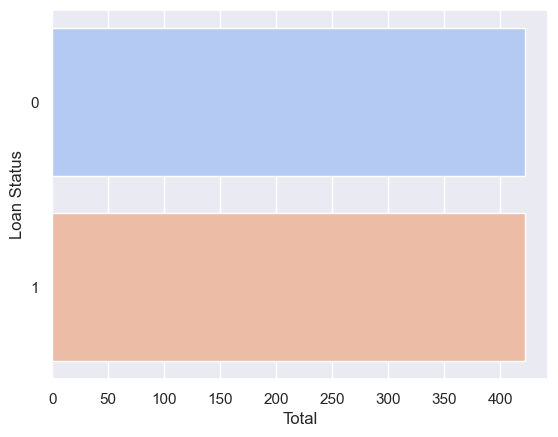

In [687]:
sns.set(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

    💚 หลังจากการทำ SMOTE Technique จะพบว่า Loan Status มีการกระจายตัวที่สมดุลมากขึ้น

## 5.8 Data Normalization

##### 💛 ในส่วนนี้ จะมีการทำการ Data Normalization เพื่อปรับช่วงของตัวแปรอิสระ(X)หรือคุณลักษณะของข้อมูลให้อยู่ในช่วงปกติ 

    การเลือกใช้เทคนิค Data Normalization ระหว่าง MinMaxScaler() หรือ Standardization 
    นั้นขึ้นอยู่กับลักษณะของข้อมูลและอัลกอริทึมที่จะนำไปใช้ โดยมีข้อแนะนำดังนี้:

    1. MinMaxScaler() 
       - เหมาะสำหรับข้อมูลที่มีค่าพิสัยกว้าง โดยจะแปลงค่าให้อยู่ในช่วง 0 ถึง 1
       - ใช้ได้ดีกับอัลกอริทึมที่ไวต่อช่วงของค่า เช่น อัลกอริทึมที่ใช้ฟังก์ชันเส้นตรงหรือเคอร์เนลเป็นฐาน
       - อาจไม่เหมาะสมสำหรับข้อมูลที่มีค่าเบี่ยงเบนมาก 

    2. Standardization
       - แปลงข้อมูลให้มีค่าเฉลี่ยเป็น 0 และส่วนเบี่ยงเบนมาตรฐานเป็น 1 
       - เหมาะสำหรับข้อมูลที่มีการกระจายตัวแบบปกติ
       - ช่วยลดอิทธิพลของ outliers
       - ใช้ได้ดีกับอัลกอริทึมที่มีการคำนวณระยะห่าง เช่น อัลกอริทึมแบบเพื่อนบ้านใกล้ที่สุด

    โดยทั่วไปแล้ว ถ้าไม่แน่ใจว่าข้อมูลมีลักษณะอย่างไร การใช้ Standardization มักให้ผลที่ดีกว่า MinMaxScaler() เนื่องจากช่วยลดอิทธิพลของค่า outliers ได้ดีกว่า 
    อย่างไรก็ตาม การทดลองทั้งสองวิธีกับข้อมูลที่มีก็เป็นสิ่งที่ดี เพื่อเลือกวิธีที่ให้ผลดีที่สุดสำหรับชุดข้อมูลนั้นๆ

##### 💛 ในที่นี้จะเลือกใช้ StandardScaler() 

In [688]:
# X =  MinMaxScaler().fit_transform(X)

In [689]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## 5.9 Splitting Dataset

##### 💚 80% train และ 20% test.

In [690]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [691]:
y_train

780    0
193    1
2      1
839    0
798    0
      ..
835    0
192    0
629    0
559    1
684    0
Name: Loan_Status, Length: 675, dtype: uint8

# 6. Models 

## 6.1 Logistic Regression

In [692]:
#Train the model on the training data
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

#Predict the target variable on the test data
y_pred = LRclassifier.predict(X_test)

#Calculating metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Calculating the accuracy score
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_test,y_pred)
print('Accuracy for Logistic Regression: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80        86
           1       0.75      0.99      0.85        83

    accuracy                           0.83       169
   macro avg       0.86      0.83      0.82       169
weighted avg       0.87      0.83      0.82       169

[[58 28]
 [ 1 82]]
Accuracy for Logistic Regression: 82.84%


## 6.2  Decision Tree

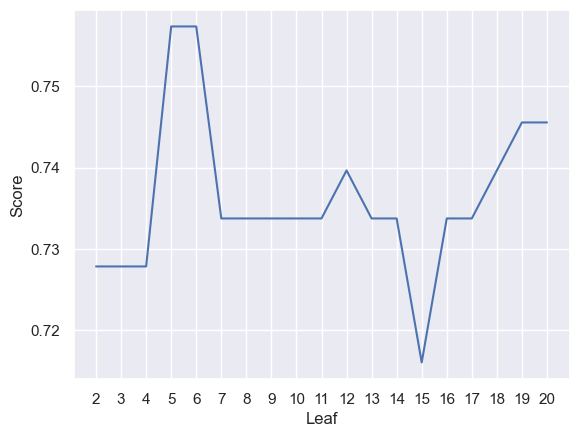

Accuracy for Decision Tree : 75.74%


In [693]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i, random_state = 1)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Accuracy for Decision Tree : {:.2f}%".format(DTAcc*100))

## 6.3 Random Forest

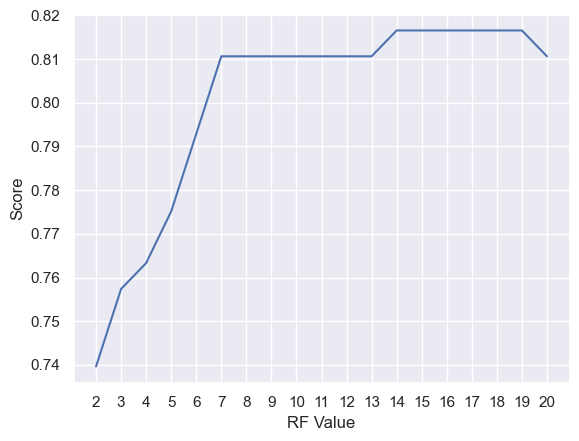

Accuracy for Random Forest :  81.66%


In [694]:
scoreListRF = []
for i in range(2,21):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListRF)
plt.xticks(np.arange(2,21,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Accuracy for Random Forest :  {:.2f}%".format(RFAcc*100))

# 7. สรุปผลโมเดลทำนายการอนุมัติสินเชื่อของลูกค้า ควรเลือกอันไหนดี

In [695]:
All_Accuracy = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
        'Accuracy': ['84.44%', '86.67%', '93.33%']}

Accuracy_df= pd.DataFrame(All_Accuracy).set_index('Model')
Accuracy_df

,Accuracy
Model,
Logistic Regression,84.44%
Decision Tree,86.67%
Random Forest,93.33%


# 8. เลือกโมเดลที่ดีที่สุด

- Assume ในที่นี้ต้องการโมเดลที่ทำนายได้แม่นยำ Accuracy สูง 
- ดังนั้นจึงเลือก **Random Forest Regression** เป็นโมเดลสำหรับทำนายความน่าจะเป็นของการอนุมัติสินเชื่อหรือปฏิเสธสินเชื่อให้กับผู้สมัครขอสินเชื่อ

- แต่ในกรณีถ้าหากไม่ได้ต้องการโมเดลที่มีความแม่นยำสูงมากนัก 
- และมีความสามารถในการอธิบายได้ (Interpretability) เนื่องจากเป็นโมเดลเชิงเส้นที่แสดงถึงน้ำหนักความสำคัญของแต่ละปัจจัยได้อย่างชัดเจน 
- อาจจะเลือกโมเดล Logistic Regression ก็ได้

# 9. การดึงโมเดล ออกไปใช้งาน

In [696]:
 import pickle

### 9.1 การบันทึกโมเดล

In [697]:
# โมเดล Random Forest  ชื่อว่า RFclassifier 
filename = 'random_forest_classification_model.sav'
pickle.dump(RFclassifier, open(filename, 'wb'))

### 9.2 การโหลดโมเดลกลับมาใช้

In [698]:
filename = 'random_forest_classification_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

### 9.3 วิธีทำนายความน่าจะเป็นของการอนุมัติหรือปฏิเสธให้กับผู้สมัครขอสินเชื่อ

#### ทำนายค่า
- loan_approve_prediction = loaded_model.predict(new_data_loan)
- โดย new_data_loan ต้องผ่านการทำ Data processing มาแล้ว

#### แสดงผลลัพธ์
- print("Predictions:", loan_approve_prediction)